In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


In [14]:
train = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv", encoding= 'latin-1')

In [15]:
train.sample(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
36764,40563,85515,Ulaanbaatar,10-04-2020,The consumer s mindset was already showing sig...,Neutral
12522,16321,61273,NaN,21-03-2020,Supermarket workers trying to ensure people ha...,Extremely Positive
18041,21840,66792,France,23-03-2020,Marketers designing messaging to ease and enga...,Positive


In [16]:
test=pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv',  encoding= 'latin-1')

In [17]:
test.sample(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1164,1165,46117,NaN,13-03-2020,If you are at the grocery store this weekend t...,Negative
2675,2676,47628,NaN,14-03-2020,"To paraphrase C S Lewis, coronavirus can kill ...",Negative
426,427,45379,"New Delhi, India",12-03-2020,US consumer prices unexpectedly rose in Februa...,Extremely Negative


In [18]:
# Checking the number of rows and columns
print("The DataFrame has " + str(train.shape[0]) + " samples and " + str(train.shape[1]) + " columns")

The DataFrame has 41157 samples and 6 columns


In [19]:
# Check duplicates
print("Duplicate entries in the dataset: " + str(train.duplicated().sum()))

Duplicate entries in the dataset: 0


# Data Exploration:

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

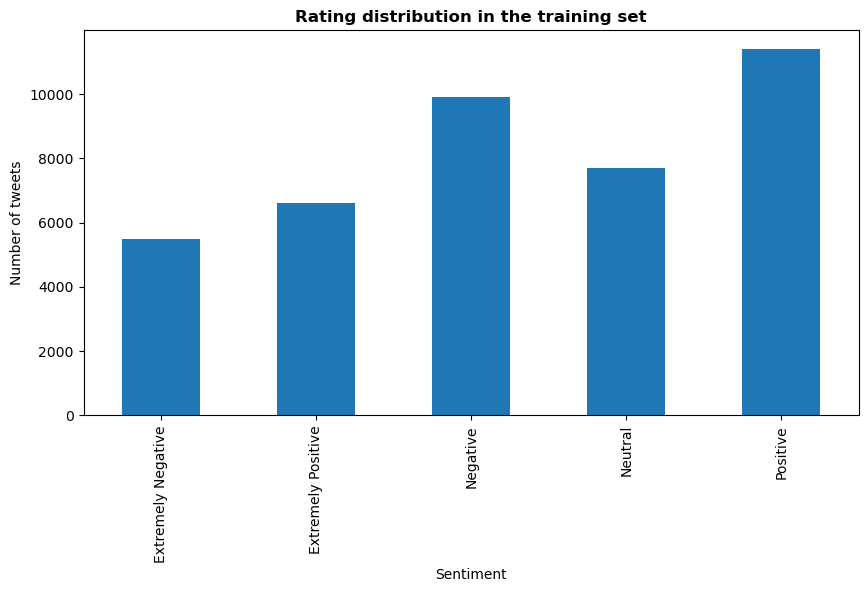

In [21]:
train['Sentiment'].value_counts().sort_index().plot.bar(figsize=(10,5))
plt.title('Rating distribution in the training set', fontweight="bold")
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

## a. Shape of Data

In [22]:
train.shape

(41157, 6)

In [23]:
test.shape

(3798, 6)

## b. Size of Data

In [24]:
train.size

246942

In [25]:
test.size

22788

## c. Attributes

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


## d. Properties

In [28]:
train.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [29]:
test.describe()

,UserName,ScreenName
count,3798.000000,3798.000000
mean,1899.500000,46851.500000
std,1096.532489,1096.532489
min,1.000000,44953.000000
25%,950.250000,45902.250000
50%,1899.500000,46851.500000
75%,2848.750000,47800.750000
max,3798.000000,48750.000000


In [30]:
train.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

In [31]:
test.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

## e. EDA

In [32]:
train.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [33]:
test.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [34]:
len(train)

41157

In [35]:
len(test)

3798

## f. Null Values

In [36]:
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [37]:
train.isnull().sum()/len(train)*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

In [38]:
test.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [39]:
test.isnull().sum()/len(test)*100

UserName          0.000000
ScreenName        0.000000
Location         21.958926
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

## g. Unique

In [40]:
train.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [41]:
test.nunique()

UserName         3798
ScreenName       3798
Location         1717
TweetAt            15
OriginalTweet    3798
Sentiment           5
dtype: int64

In [42]:
train.nunique().sum()

135726

In [43]:
test.nunique().sum()

13131

# 3. Data Pre-processing

## a. NULL Values

In [44]:
total_null_train = train.isnull().sum().sort_values(ascending = False)
percentage_null_train=((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending = False)

print("Total records = ", train.shape[0])

missing_data = pd.concat([total_null_train, percentage_null_train.round(2)], axis=1, keys=['Total Missing', 'In Percent'])
missing_data.head(12)

Total records =  41157


,Total Missing,In Percent
Location,8590,20.87
UserName,0,0.00
ScreenName,0,0.00
TweetAt,0,0.00
OriginalTweet,0,0.00
Sentiment,0,0.00


In [45]:
total_null_test = test.isnull().sum().sort_values(ascending = False)
percentage_null_test=((test.isnull().sum()/test.isnull().count())*100).sort_values(ascending = False)

print("Total records = ", test.shape[0])

missing_data = pd.concat([total_null_test, percentage_null_test.round(2)], axis=1, keys=['Total Missing', 'In Percent'])
missing_data.head(12)

Total records =  3798


,Total Missing,In Percent
Location,834,21.96
UserName,0,0.00
ScreenName,0,0.00
TweetAt,0,0.00
OriginalTweet,0,0.00
Sentiment,0,0.00


In [46]:
train = train.drop(columns=['Location'], axis=1)

In [47]:
train.isnull().sum()

UserName         0
ScreenName       0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [48]:
test = test.drop(columns=['Location'], axis=1)

In [49]:
test.isnull().sum()

UserName         0
ScreenName       0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

## b. Reduction of Data

In [50]:
train['Sentiment'].nunique()

5

In [51]:
train.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [52]:
test['Sentiment'].nunique()

5

In [53]:
test.Sentiment.value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

#### Extract and separate the data based on their labels

In [54]:
train0=train[train['Sentiment']=='Negative']
train1=train[train['Sentiment']=='Positive']
train2=train[train['Sentiment']=='Neutral']
train3=train[train['Sentiment']=='Extremely Positive']
train4=train[train['Sentiment']=='Extremely Negative']

In [55]:
train0.shape, train1.shape, train2.shape, train3.shape, train4.shape

((9917, 5), (11422, 5), (7713, 5), (6624, 5), (5481, 5))

#### Reducing size of each label by 1/5

In [56]:
train0=train0[:int(train0.shape[0]/5)]
train1=train1[:int(train1.shape[0]/5)]
train2=train2[:int(train2.shape[0]/5)]
train3=train3[:int(train3.shape[0]/5)]
train4=train4[:int(train4.shape[0]/5)]

In [57]:
train0.shape, train1.shape, train2.shape, train3.shape, train4.shape

((1983, 5), (2284, 5), (1542, 5), (1324, 5), (1096, 5))

In [58]:
train=pd.concat([train0,train1,train2,train3,train4],axis=0)

In [59]:
train.shape

(8229, 5)

In [60]:
train.head()

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment
9,3808,48760,16-03-2020,"For corona prevention,we should stop to buy th...",Negative
24,3823,48775,16-03-2020,@10DowningStreet @grantshapps what is being do...,Negative
26,3825,48777,16-03-2020,In preparation for higher demand and a potenti...,Negative
28,3827,48779,16-03-2020,Do you see malicious price increases in NYC? T...,Negative
30,3829,48781,16-03-2020,There Is of in the Country The more empty she...,Negative


#### Dropping all the columns except OriginalTweet and Sentiment

In [61]:
train=train.drop(['UserName','ScreenName','TweetAt'],axis=1)

In [62]:
train.head()

,OriginalTweet,Sentiment
9,"For corona prevention,we should stop to buy th...",Negative
24,@10DowningStreet @grantshapps what is being do...,Negative
26,In preparation for higher demand and a potenti...,Negative
28,Do you see malicious price increases in NYC? T...,Negative
30,There Is of in the Country The more empty she...,Negative


In [63]:
train.Sentiment.value_counts()

Positive              2284
Negative              1983
Neutral               1542
Extremely Positive    1324
Extremely Negative    1096
Name: Sentiment, dtype: int64

In [64]:
test=test.drop(['UserName','ScreenName','TweetAt'],axis=1)

In [65]:
test.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [66]:
test.Sentiment.value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

## c. Data Cleaning 

### i. Hashtag Removal

In [67]:
import re

In [68]:
def hashtags_removal(text):
    hashtags = "#[\S]+"
    text = re.sub(hashtags,"",text)
    return text

In [69]:
#Remove Hashtags train
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: hashtags_removal(x))

In [70]:
#Remove Hashtags test
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: hashtags_removal(x))

### ii. Mentions Removal

In [71]:
def mentions_removal(text):
    mentions = "@[\S]+"
    text = re.sub(mentions,"",text)
    return text

In [72]:
#Remove Mention train
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: mentions_removal(x))

In [73]:
#Remove Mention test
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: mentions_removal(x))

### iii. URL Removal

In [74]:
def url_removal(text):
    url = "https?://[A-z0-9_%/\-\.]+[A-z0-9_\.\-\?&=%]+"
    text = re.sub(url,"",text)
    return text

In [75]:
#Remove URL train
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: url_removal(x))

In [76]:
#Remove URL test
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: url_removal(x))

### iv. Stopwords Removal

In [77]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [78]:
# train stopwords removal
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [79]:
# test stopwords removal
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

### v. LowerCase

In [80]:
# training lowercase
train['OriginalTweet']=train['OriginalTweet'].str.lower()

In [81]:
# testing lowercase
test['OriginalTweet']=test['OriginalTweet'].str.lower()

### vi. Stemming

In [82]:
import nltk

In [83]:
from nltk.stem import PorterStemmer

In [84]:
stemmer = PorterStemmer()

In [85]:
def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence.lower())
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop]
    stemmed_sentence = " ".join(stemmed_words)
    return stemmed_sentence

In [86]:
train["OriginalTweet"] = train["OriginalTweet"].apply(stem_sentence)

### vii. Removing Punctuations

In [87]:
def punctuations_removal(text):
    puntuations = "[\.\?!,;:]+"
    text = re.sub(puntuations,"",text)
    return text

In [88]:
#Remove Punctuations train
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: punctuations_removal(x))

In [89]:
#Remove Punctuations test
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: punctuations_removal(x))

## d. Randomization

In [90]:
train_array = train.to_numpy()
np.random.shuffle(train_array)
train = pd.DataFrame(train_array, columns=train.columns)

In [91]:
train.head()

,OriginalTweet,Sentiment
0,trolli basket need clean regularli otherwis c...,Neutral
1,sainsburi 's announc elderly-onli open hour,Neutral
2,school work cater provid local author provid f...,Negative
3,done us pop supermarket way home work buy sala...,Positive
4,sneez supermarket swear peopl stop look like p...,Extremely Negative


In [92]:
test_array = test.to_numpy()
np.random.shuffle(test_array)
test = pd.DataFrame(test_array, columns=test.columns)

In [93]:
test.head()

,OriginalTweet,Sentiment
0,instead panic buying crowded supermarkets pop ...,Neutral
1,please close all retail pharmacy grocery store...,Positive
2,remember leave things supermarket shelf's othe...,Negative
3,if booked trip event tickets &amp itâs cancel...,Extremely Negative
4,the grocery store fucking mad house right remi...,Extremely Negative


# 4. EDA for final Dataset

In [94]:
train

,OriginalTweet,Sentiment
0,trolli basket need clean regularli otherwis c...,Neutral
1,sainsburi 's announc elderly-onli open hour,Neutral
2,school work cater provid local author provid f...,Negative
3,done us pop supermarket way home work buy sala...,Positive
4,sneez supermarket swear peopl stop look like p...,Extremely Negative
...,...,...
8224,- 3 ...,Neutral
8225,bori go local supermarket & amp see size crow...,Extremely Positive
8226,covid-19 's wear glove ideal & amp handwash ...,Positive
8227,joeâ kitchen covid-19 meal messag todayâ lu...,Neutral


In [95]:
test

,OriginalTweet,Sentiment
0,instead panic buying crowded supermarkets pop ...,Neutral
1,please close all retail pharmacy grocery store...,Positive
2,remember leave things supermarket shelf's othe...,Negative
3,if booked trip event tickets &amp itâs cancel...,Extremely Negative
4,the grocery store fucking mad house right remi...,Extremely Negative
...,...,...
3793,does government understand unless stop everyon...,Negative
3794,wiped supermarket pasta &amp toilet rolls staf...,Extremely Positive
3795,today i talk us store closings due &amp means ...,Neutral
3796,apart irresponsible shoppers crazy donât go t...,Extremely Negative


### Pie Chart Distribution of sample train tweets

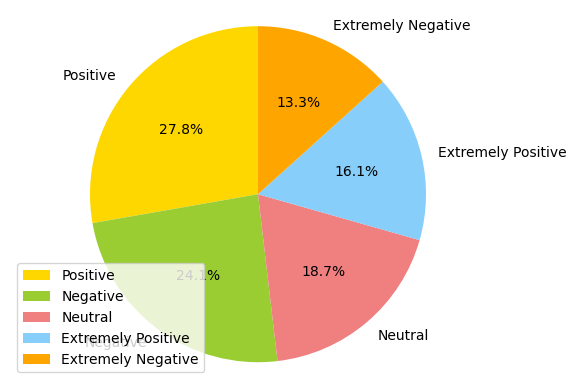

In [96]:
sentiment_counts = train['Sentiment'].value_counts()
labels = ['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']

plt.pie(sentiment_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend()
plt.show()

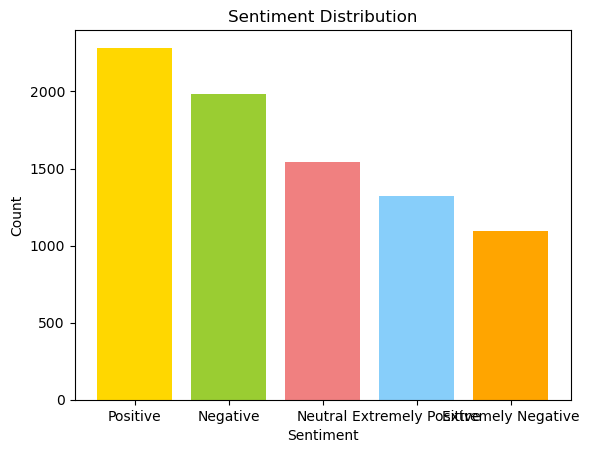

In [97]:
sentiment_counts = train['Sentiment'].value_counts()
labels = ['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']

plt.bar(labels, sentiment_counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [98]:
train.shape

(8229, 2)

In [99]:
test.shape

(3798, 2)

In [100]:
train.head()

,OriginalTweet,Sentiment
0,trolli basket need clean regularli otherwis c...,Neutral
1,sainsburi 's announc elderly-onli open hour,Neutral
2,school work cater provid local author provid f...,Negative
3,done us pop supermarket way home work buy sala...,Positive
4,sneez supermarket swear peopl stop look like p...,Extremely Negative


In [101]:
test.head()

,OriginalTweet,Sentiment
0,instead panic buying crowded supermarkets pop ...,Neutral
1,please close all retail pharmacy grocery store...,Positive
2,remember leave things supermarket shelf's othe...,Negative
3,if booked trip event tickets &amp itâs cancel...,Extremely Negative
4,the grocery store fucking mad house right remi...,Extremely Negative


In [102]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8229 entries, 0 to 8228
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  8229 non-null   object
 1   Sentiment      8229 non-null   object
dtypes: object(2)
memory usage: 128.7+ KB


In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  3798 non-null   object
 1   Sentiment      3798 non-null   object
dtypes: object(2)
memory usage: 59.5+ KB


In [104]:
train.describe()

,OriginalTweet,Sentiment
count,8229,8229
unique,8203,5
top,,Positive
freq,5,2284


In [105]:
test.describe()

,OriginalTweet,Sentiment
count,3798,3798
unique,3792,5
top,americans stock up on food covid-19 concerns rise,Negative
freq,2,1041


In [106]:
train.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [107]:
test.isnull().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

# 5. Vectorization

## a. TF-IDF

In [108]:
# # TfidfVectorizer from sklearn.feature_extraction.text module
# from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
# # Creating a word corpus for vectorization
# corpus = []
# for i in range(x.shape[0]):
#     corpus.append(x.iloc[i])

# vectorizer1 = TfidfVectorizer(max_features=1000)
# X1 = vectorizer1.fit_transform(corpus)
# feature_names1 = vectorizer1.get_feature_names_out()
# denselist1 = X1.todense().tolist()
# train = pd.DataFrame(denselist1, columns=feature_names1)

## b. BoW

In [110]:
# from sklearn.feature_extraction.text import CountVectorizer

In [111]:
# corpus = []
# for i in range(x.shape[0]):
#     corpus.append(x.iloc[i])
    
# vectorizer = CountVectorizer(max_features=1000)
# X = vectorizer.fit_transform(corpus)
# feature_names = vectorizer.get_feature_names_out()
# denselist = X.todense().tolist()
# train = pd.DataFrame(denselist, columns=feature_names)

# Text Proprocessing

## Training Set

In [112]:
import re
from nltk.corpus import stopwords

# Create a stopwords set adding some personal 'words'
stopwords_english = set(stopwords.words('english'))
my_stopwords = set(["http", "'s", "n't", "'m", "'re", "'ve"])
stopwords_english.update(my_stopwords)

def preprocess_review(text):
    # Convert to lower case
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Split text into tokens
    tokens = text.split()

    # Filter tokens
    clean_tokens = [tok for tok in tokens if tok not in stopwords_english and len(tok) > 1]

    # Join tokens into a string
    clean_text = ' '.join(clean_tokens)

    return clean_text

In [113]:
# Get one review as sample
sample = train['OriginalTweet'][50]

print('ORIGINAL REVIEW:   ' + sample + '\n')
print('---------------------------------------------------------------------------- \n')
print('WITH PROCESSING:    ' + preprocess_review(sample))

ORIGINAL REVIEW:   danish solut order stop peopl `` collect '' hand sanit supermarket denmark came follow price  1 bottl 40 kronen 2 bottl 1000 kronen would work loo roll  

---------------------------------------------------------------------------- 

WITH PROCESSING:    danish solut order stop peopl collect hand sanit supermarket denmark came follow price bottl kronen bottl kronen would work loo roll


In [114]:
%%time

# Preprocess training data adding new column
train["clean_text"] = train["OriginalTweet"].apply(preprocess_review)

CPU times: user 173 ms, sys: 2.95 ms, total: 176 ms
Wall time: 176 ms


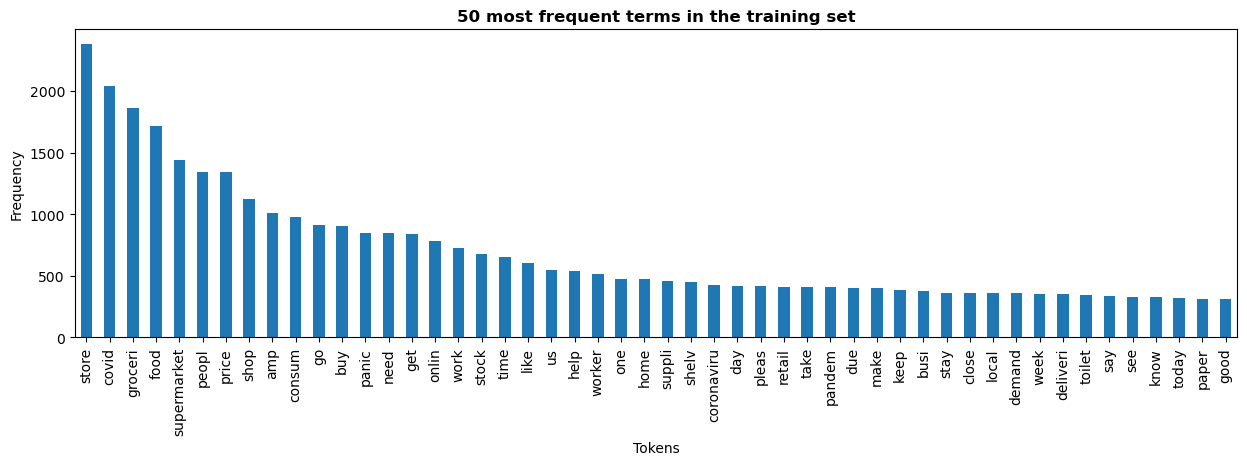

In [135]:
# Get 50 most frequent words in the training set
frequent_words = pd.Series(' '.join(train.clean_text).split()).value_counts()[:50]
frequent_words.plot.bar(figsize=(15,4))
plt.title('50 most frequent terms in the training set', fontweight="bold")
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.show()

In [136]:
# I found that the variable 'frequent_words' takes up about 6 Gb of RAM! Better clean it up!
import gc

del frequent_words

gc.collect()

14368

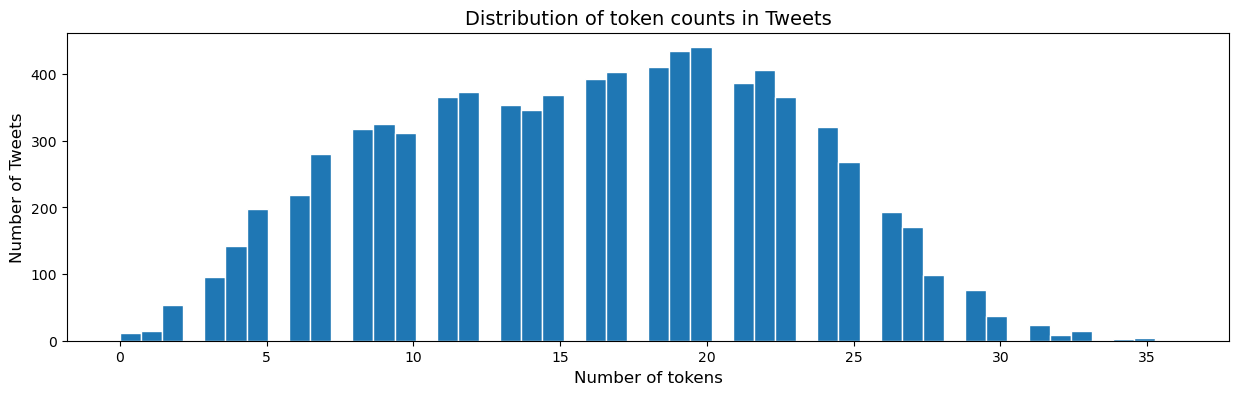

In [137]:
# Plot the number of tokens in cleaned reviews
plt.figure(figsize=(15,4))
plt.hist(train['clean_text'].apply(lambda x:len(x.split())), bins=50, edgecolor='white')
plt.xlabel('Number of tokens', fontsize=12)
plt.ylabel('Number of Tweets',fontsize=12)
plt.title('Distribution of token counts in Tweets', fontsize=14)
plt.show()

In [139]:
# Filter rows with less than 250 tokens
less_than_50 = train['clean_text'].apply(lambda x: len(x.split())) < 50  # Check by getting True and False values

# Print percentage
print(f"{(sum(less_than_50) / len(train) * 100):.2f}% of rows have less than 50 tokens.")

100.00% of rows have less than 50 tokens.


In [141]:
train.head()

,Sentiment,clean_text
0,Neutral,trolli basket need clean regularli otherwis co...
1,Neutral,sainsburi announc elderlyonli open hour
2,Negative,school work cater provid local author provid f...
3,Positive,done us pop supermarket way home work buy sala...
4,Extremely Negative,sneez supermarket swear peopl stop look like p...


In [140]:
# Remove original tweet column
train = train.drop(columns=['OriginalTweet'])

# Get few entries to check operation
train.head()

,Sentiment,clean_text
0,Neutral,trolli basket need clean regularli otherwis co...
1,Neutral,sainsburi announc elderlyonli open hour
2,Negative,school work cater provid local author provid f...
3,Positive,done us pop supermarket way home work buy sala...
4,Extremely Negative,sneez supermarket swear peopl stop look like p...


## Testing Set

In [142]:
%%time

# Preprocess training data adding new column
test["clean_text"] = test["OriginalTweet"].apply(preprocess_review)

# Remove original text column
test = test.drop(columns=['OriginalTweet'])

# Get few entries to check cleaning operation
test.head()

CPU times: user 101 ms, sys: 110 µs, total: 101 ms
Wall time: 101 ms


,Sentiment,clean_text
0,Neutral,instead panic buying crowded supermarkets pop ...
1,Positive,please close retail pharmacy grocery store peo...
2,Negative,remember leave things supermarket shelfs other...
3,Extremely Negative,booked trip event tickets amp itâs cancelled m...
4,Extremely Negative,grocery store fucking mad house right remind n...


# 6. Model Application

### Defining X(independent variable --> OriginalTweet) and Y(dependent varible --> Sentiment)

In [143]:
train

,Sentiment,clean_text
0,Neutral,trolli basket need clean regularli otherwis co...
1,Neutral,sainsburi announc elderlyonli open hour
2,Negative,school work cater provid local author provid f...
3,Positive,done us pop supermarket way home work buy sala...
4,Extremely Negative,sneez supermarket swear peopl stop look like p...
...,...,...
8224,Neutral,
8225,Extremely Positive,bori go local supermarket amp see size crowd s...
8226,Positive,covid wear glove ideal amp handwash best
8227,Neutral,joeâ kitchen covid meal messag todayâ lunch pu...


In [144]:
test

,Sentiment,clean_text
0,Neutral,instead panic buying crowded supermarkets pop ...
1,Positive,please close retail pharmacy grocery store peo...
2,Negative,remember leave things supermarket shelfs other...
3,Extremely Negative,booked trip event tickets amp itâs cancelled m...
4,Extremely Negative,grocery store fucking mad house right remind n...
...,...,...
3793,Negative,government understand unless stop everyone goi...
3794,Extremely Positive,wiped supermarket pasta amp toilet rolls staff...
3795,Neutral,today talk us store closings due amp means loo...
3796,Extremely Negative,apart irresponsible shoppers crazy donât go as...


### Split the data

In [146]:
# Create X, y arrays
from sklearn.model_selection import train_test_split

# Training data
X_train = train["clean_text"].values
y_train = train["Sentiment"].values

# Split into train/test sets
X_tr, X_va, y_tr, y_va = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Test data
X_te = test["clean_text"].values

print("Training data:", X_tr.shape, y_tr.shape)
print("Validation data:", X_va.shape, y_va.shape)
print("Test data:", X_te.shape)

Training data: (6583,) (6583,)
Validation data: (1646,) (1646,)
Test data: (3798,)


### Model Part

In [148]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() 
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    
    strategy = tf.distribute.experimental.TPUStrategy
except ValueError:
    strategy = tf.distribute.get_strategy() 
    print('Number of replicas:', strategy.num_replicas_in_sync) 

Number of replicas: 1


In [149]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver() # TPU detection
except ValueError:
    tpu = None
    gpus = tf.config.experimental.list_logical_devices("GPU")
    
if tpu:
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu,) 
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
elif len(gpus) > 1:
    strategy = tf.distribute.MirroredStrategy([gpu.name for gpu in gpus])
    print('Running on multiple GPUs ', [gpu.name for gpu in gpus])
elif len(gpus) == 1:
    strategy = tf.distribute.get_strategy() 
    print('Running on single GPU ', gpus[0].name)
else:
    strategy = tf.distribute.get_strategy() 
    print('Running on CPU')
print("Number of accelerators: ", strategy.num_replicas_in_sync)

Running on CPU
Number of accelerators:  1


In [150]:
%%time

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize and pad the sequences
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_tr)

max_seq_length = 250

X_tr_seq = tokenizer.texts_to_sequences(X_tr)
X_tr_seq = pad_sequences(X_tr_seq, maxlen=max_seq_length)

X_va_seq = tokenizer.texts_to_sequences(X_va)
X_va_seq = pad_sequences(X_va_seq, maxlen=max_seq_length)

X_te_seq = tokenizer.texts_to_sequences(X_te)
X_te_seq = pad_sequences(X_te_seq, maxlen=max_seq_length)

CPU times: user 570 ms, sys: 5.04 ms, total: 575 ms
Wall time: 574 ms


In [154]:
X_tr_seq

array([[   0,    0,    0, ...,  823, 3447,  707],
       [   0,    0,    0, ...,  881,    2,  159],
       [   0,    0,    0, ..., 1995,   22,  658],
       ...,
       [   0,    0,    0, ..., 3641, 4006, 4007],
       [   0,    0,    0, ...,    3,    1, 1232],
       [   0,    0,    0, ...,  474, 2126,  903]], dtype=int32)

In [155]:
X_va_seq

array([[   0,    0,    0, ..., 4991,   14,   12],
       [   0,    0,    0, ..., 1571,    5,  424],
       [   0,    0,    0, ...,  253,   79,   84],
       ...,
       [   0,    0,    0, ...,  733, 1939,  216],
       [   0,    0,    0, ...,    8,  277,   81],
       [   0,    0,    0, ...,    9,   79,  603]], dtype=int32)

In [156]:
X_te_seq

array([[   0,    0,    0, ...,   43,   13, 3030],
       [   0,    0,    0, ...,  330,    2,   25],
       [   0,    0,    0, ...,   13, 9467,   56],
       ...,
       [   0,    0,    0, ...,  140,  173, 1046],
       [   0,    0,    0, ...,  857,  233,  152],
       [   0,    0,    0, ...,  519,   35,  389]], dtype=int32)

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

with strategy.scope():
    model = Sequential()
    model.add(Embedding(input_dim=20000, output_dim=128, input_length=250))

    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))

    model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Bidirectional(LSTM(units=128)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=6, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate = 1e-4),
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['acc']
                 )

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 128)          2560000   
                                                                 
 conv1d (Conv1D)             (None, 248, 64)           24640     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 124, 64)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 124, 128)         66048     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 124, 128)         512       
 ormalization)                                                   
                                                      

#### EarlyStopping to avoid overfitting

In [152]:
from tensorflow.keras.callbacks import EarlyStopping

# Creates 'EarlyStopping' callback
earlystopping_cb = EarlyStopping(patience=4, restore_best_weights=True)

In [179]:
X_tr_seq.shape

(6583, 250)

In [183]:
y_tr.shape

(6583,)

In [184]:
X_va_seq.shape

(1646, 250)

In [185]:
y_va.shape

(1646,)

### Label Encoding from sting to numeric

In [158]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_tr = label_encoder.fit_transform(y_tr)
y_va = label_encoder.transform(y_va)


In [159]:
y_tr = y_tr.astype(float)
y_va = y_va.astype(float)

### Model fitting

In [160]:
%%time

history = model.fit(X_tr_seq,
                    y_tr,
                    validation_data=(X_va_seq, y_va),
                    callbacks=[earlystopping_cb],
                    batch_size=64,
                    epochs=15,
                    verbose=1,
                   )

Epoch 1/15
103/103 [==============================] - 62s 543ms/step - loss: 2.2256 - acc: 0.2273 - val_loss: 1.7581 - val_acc: 0.2351
Epoch 2/15
103/103 [==============================] - 54s 523ms/step - loss: 1.9624 - acc: 0.2686 - val_loss: 1.7241 - val_acc: 0.2351
Epoch 3/15
103/103 [==============================] - 54s 528ms/step - loss: 1.7418 - acc: 0.3301 - val_loss: 1.6845 - val_acc: 0.2922
Epoch 4/15
103/103 [==============================] - 54s 526ms/step - loss: 1.5082 - acc: 0.4179 - val_loss: 1.6853 - val_acc: 0.2345
Epoch 5/15
103/103 [==============================] - 55s 531ms/step - loss: 1.2935 - acc: 0.4979 - val_loss: 1.6313 - val_acc: 0.3153
Epoch 6/15
103/103 [==============================] - 55s 537ms/step - loss: 1.0600 - acc: 0.5991 - val_loss: 1.4612 - val_acc: 0.3900
Epoch 7/15
103/103 [==============================] - 54s 529ms/step - loss: 0.8604 - acc: 0.6824 - val_loss: 1.5436 - val_acc: 0.3979
Epoch 8/15
103/103 [==============================] - 5

## Graph Plotting

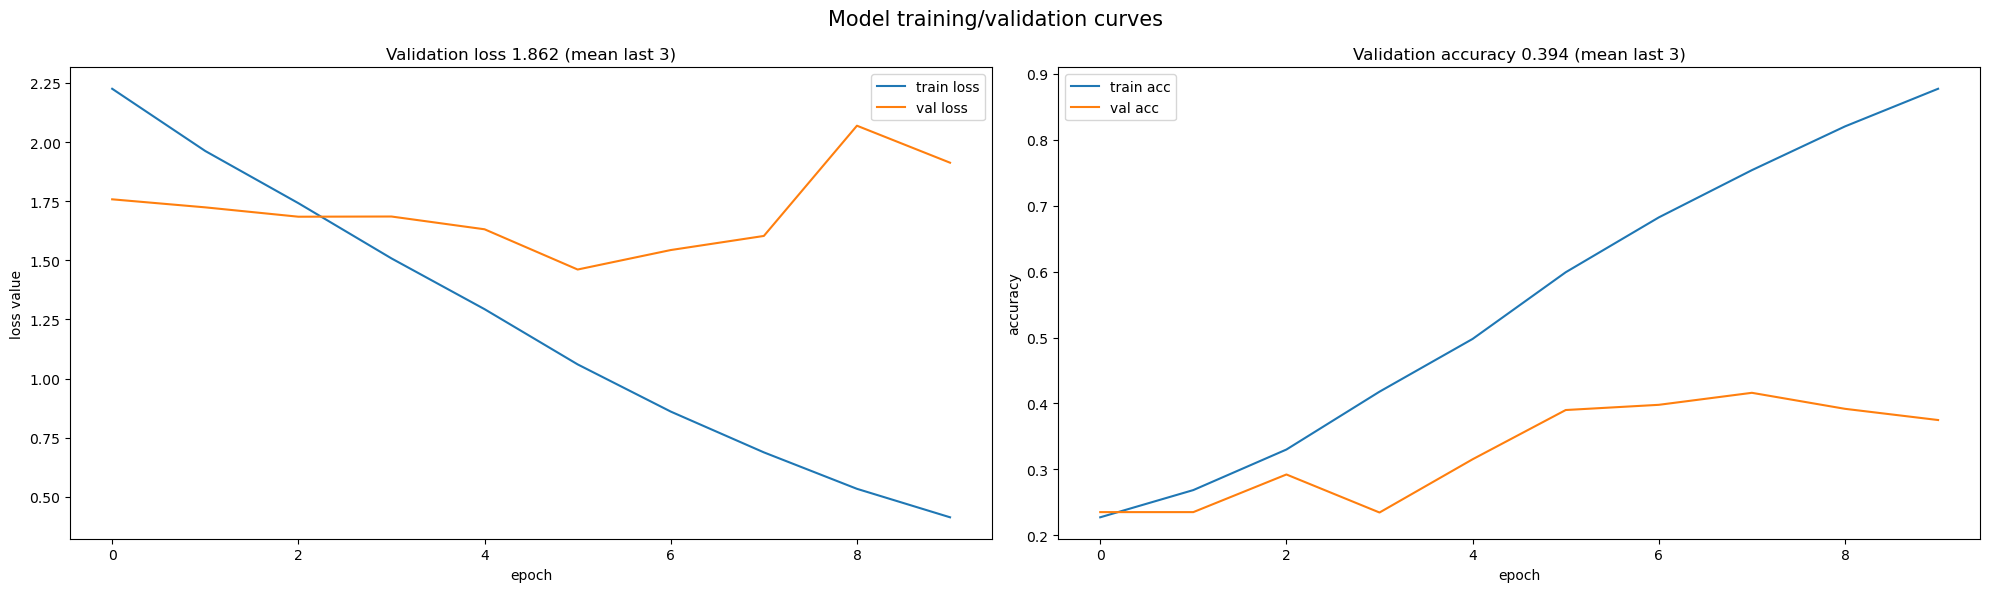

In [161]:
import numpy as np

# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

plt.suptitle('Model training/validation curves', size=15)

# Plot loss values
ax1.plot(history.history["loss"], label="train loss")
ax1.plot(history.history["val_loss"], label="val loss")
ax1.set_title(
    "Validation loss {:.3f} (mean last 3)".format(
        np.mean(history.history["val_loss"][-3:])  # last three values
    )
)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss value")
ax1.legend()

# Plot accuracy values
ax2.plot(history.history["acc"], label="train acc")
ax2.plot(history.history["val_acc"], label="val acc")
ax2.set_title(
    "Validation accuracy {:.3f} (mean last 3)".format(
        np.mean(history.history["val_acc"][-3:])  # last three values
    )
)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend()
plt.tight_layout()
plt.show()

### Model accuracy on validation set

In [162]:
test_loss, test_acc = model.evaluate(X_va_seq,y_va)

print('Validation loss:', test_loss)
print('Validation accuracy:', test_acc)

52/52 [==============================] - 6s 106ms/step - loss: 1.4612 - acc: 0.3900
Validation loss: 1.4611684083938599
Validation accuracy: 0.3900364637374878


In [163]:
# Compute validation set predictions
pred = [np.argmax(i) for i in model.predict(X_va_seq)]

52/52 [==============================] - 7s 108ms/step


### Confusion Matrix

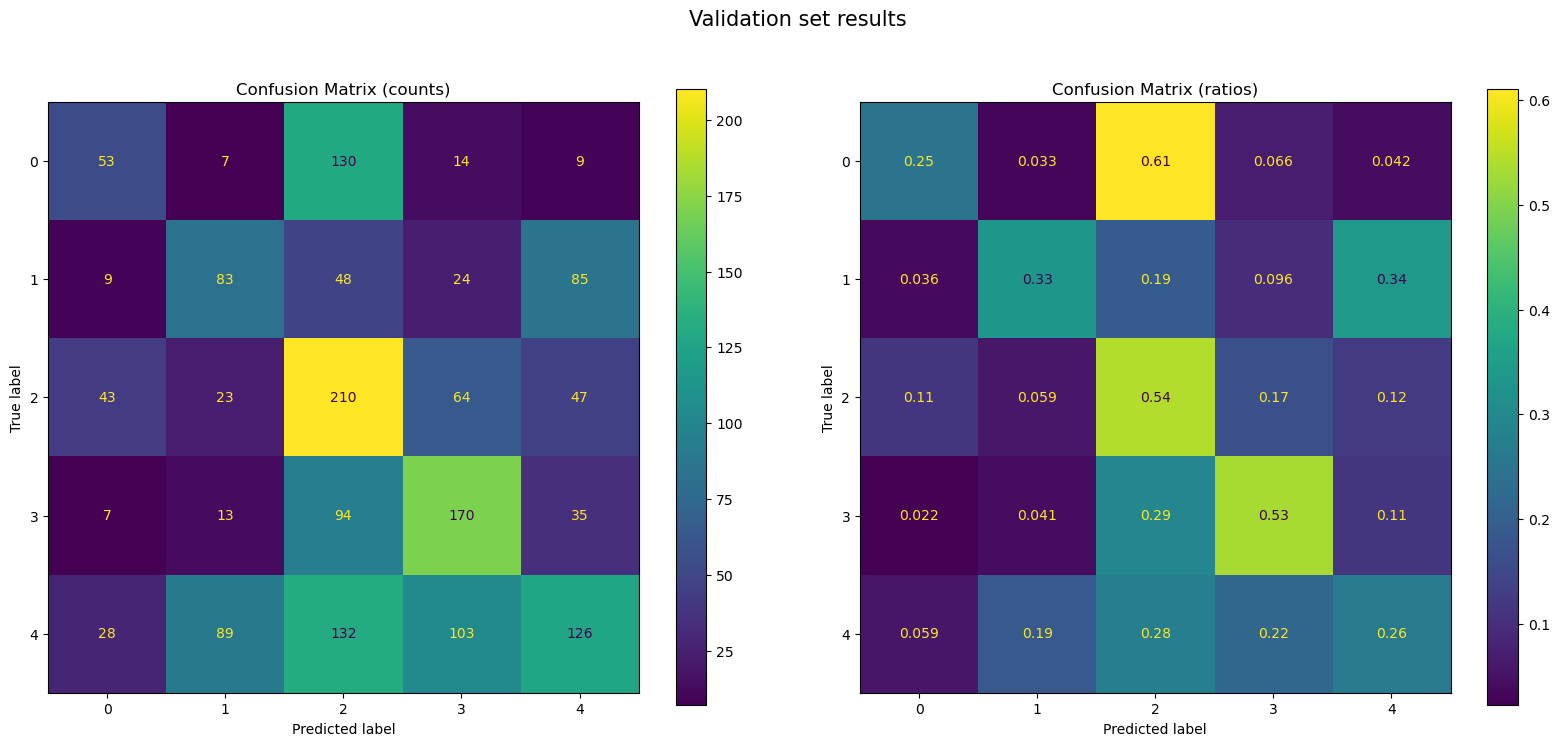

In [164]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix for raw counts
cm_raw = confusion_matrix(y_va, pred)

# Compute confusion matrix for normalized ratios
cm_norm = confusion_matrix(y_va, pred, normalize='true')

# Create confusion matrix plots
disp_raw = ConfusionMatrixDisplay(confusion_matrix=cm_raw)
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm)

# Plot confusion matrices side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={"width_ratios": [10, 10], "wspace": 0.1}, subplot_kw={"aspect":"equal"})
plt.suptitle('Validation set results', size = 15)
disp_raw.plot(ax=axs[0])
axs[0].set_title('Confusion Matrix (counts)')
disp_norm.plot(ax=axs[1])
axs[1].set_title('Confusion Matrix (ratios)')
plt.show()

In [170]:
test

,Sentiment,clean_text
0,Neutral,instead panic buying crowded supermarkets pop ...
1,Positive,please close retail pharmacy grocery store peo...
2,Negative,remember leave things supermarket shelfs other...
3,Extremely Negative,booked trip event tickets amp itâs cancelled m...
4,Extremely Negative,grocery store fucking mad house right remind n...
...,...,...
3793,Negative,government understand unless stop everyone goi...
3794,Extremely Positive,wiped supermarket pasta amp toilet rolls staff...
3795,Neutral,today talk us store closings due amp means loo...
3796,Extremely Negative,apart irresponsible shoppers crazy donât go as...


### Make predictions

In [174]:
# Compute test set predictions
predictions = [np.argmax(i) for i in model.predict(X_te_seq)]
    
# Create a new DataFrame to merge review ids and the model predictions
submission = pd.DataFrame({'OriginalTweet': test.clean_text, 'Sentiment': predictions})

# Check few random entries
submission.sample(10)

119/119 [==============================] - 13s 105ms/step


,OriginalTweet,Sentiment
2258,youâre hoarding outrageous amounts canned food...,2
977,govt understand consumer spending concrete act...,3
1705,many ppl stocking water jugs grocery store tod...,3
2184,great prices flights costa rica right due sales,3
1813,one way looking neighbors young amp old time s...,3
3750,chaos please forget stock food pets gonna get ...,2
1088,posts keep seeing yâall regarding covid dismis...,2
2188,time wish extreme coupon clipper stockpiles st...,3
1520,reading german friends covid update ran new wo...,2
835,covid concerns amp consumer confidence drop th...,3


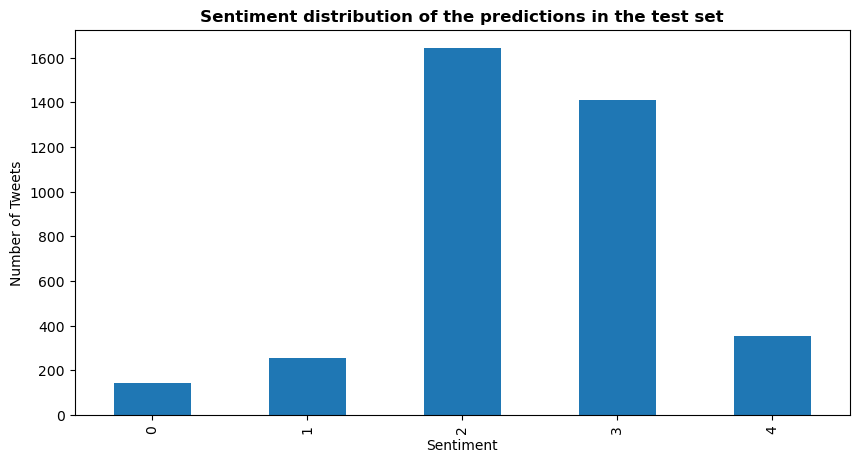

In [175]:
# Check target balance
submission['Sentiment'].value_counts().sort_index().plot.bar(figsize=(10,5))
plt.title('Sentiment distribution of the predictions in the test set', fontweight="bold")
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [177]:
# Export predictions
submission.to_csv("submission.csv", index=None)